In [57]:
# LSW Mu;i Labelled Classification
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections.abc import Sequence, Set

dataset_dir_path = "~/Desktop/Tickets"
categorical_columns = ['Kategorie ID', 'Unterkategorie ID']

tickets = pd.read_csv(f"{dataset_dir_path}/multi_labelled_data.csv")

tickets.head()

,Unnamed: 0,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,...,filtered_beschreibung,stemmed_text,stemmed_beschreibung,Produkt Label (Merged),RandomForestClassifier Predictions,New Labels,SVC Predictions,MultinomialNB Predictions,LogisticRegression Predictions,KNeighborsClassifier Predictions
0,0,2000013988,hallo wir haben nächste woche einen sap bw ku...,2023-01-03 16:28:53,kurs vorbereiten,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,...,kurs vorbereiten,hallo nach woch sap bw kur bitt 16 student use...,kur vorbereit,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects
1,2,2000013990,please could you send the url access details a...,2023-01-05 18:17:10,access details required,ZSD_SR_HANA,ZSD_SR_HANA_SE,2. Level,Applikation,HANA,...,access details required,send url access detail instruct set user accou...,access detail requir,HANA,HANA,HANA,HANA,HANA,HANA,HANA
2,3,2000013991,hi team hcmc university of technology faculty...,2023-01-06 00:59:27,new contract for hcmcut,ZSD_SR_KTV,,2. Level,Applikation,Sonstiges,...,new contract hcmcut,hi team hcmc univers technolog faculti industr...,new contract hcmcut,Sonstiges,global bike,"global bike,Sonstiges",global bike,Sonstiges,global bike,global bike
3,5,2000013993,sysysid bw1 symandt 800 installation number...,2023-01-09 11:43:27,fwd wtrlt produktauslieferung und zuga,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,...,fwd wtrlt produktauslieferung und zuga,sysysid bw1 symandt 800 instal number 00209357...,fwd wtrlt produktauslieferung und zuga,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects
4,6,2000013994,sehr geehrte damen und herren anbei erhalten ...,2023-01-09 14:19:45,ts410 kursanmeldung,ZSD_SR_TERP,ZSD_SR_TERP_ANF,2. Level,Applikation,TS410,...,ts410 kursanmeldung,geehrt dam herr anbei erhalt kursanmeld sap ts...,ts410 kursanmeld,TS410,TS410,TS410,TS410,TS410,TS410,TS410


In [58]:
# labels = tickets['New Labels'].map(lambda labels_str: labels_str.split(','))

# # classes = list(set(tickets['Produkt Label (Merged)']))
# multi_binarizer = MultiLabelBinarizer()
# multi_binarizer.fit(labels)

# def get_multi_label_data(test_size = 0.2):
#     x_train_raw, x_test_raw, y_train, y_test = train_test_split(
#         tickets[['stemmed_text', 'stemmed_beschreibung'] + categorical_columns], # x
#         labels, # y
#         test_size = test_size,
#         random_state = 1)

#     y_train = multi_binarizer.transform(y_train)
#     y_test = multi_binarizer.transform(y_test)

#     # Tfidf vectorization for the training set
#     # TEXT column
#     tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
#     tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(x_train_raw['stemmed_text'].values.astype('U'))
#     # DESCRIPTION column
#     tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
#     tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(x_train_raw['stemmed_beschreibung'].values.astype('U'))
#     # Combine the Tfidf train-matrices horizontally
#     tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))

#     # Tfidf vectorization for the testing set
#     # TEXT and DECRIPTION column
#     tfidf_matrix_text_test = tfidf_vectorizer_text.transform(x_test_raw['stemmed_text'].values.astype('U'))
#     tfidf_matrix_description_test = tfidf_vectorizer_description.transform(x_test_raw['stemmed_beschreibung'].values.astype('U'))
#     # Combine the Tfidf test-matrices horizontally
#     tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))

#     # 6b. Combining categorical and text data
#     # One-hot encoding for categorical data
#     encoder = OneHotEncoder(handle_unknown = 'ignore')
#     encoded_data_train = encoder.fit_transform(x_train_raw[categorical_columns]).toarray()
#     encoded_data_test = encoder.transform(x_test_raw[categorical_columns]).toarray()

#     # Convert the one-hot encoded arrays to sparse matrices
#     encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
#     encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

#     # Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
#     x_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))
#     x_test = hstack((tfidf_matrix_combined_test, encoded_sparse_test))

#     return x_train, x_test, y_train, y_test

# #print(final_matrix_train)

# # Classification and evaluation in one method with different classifiers as parameter
# def multiclassify_with_metrics(classifier, x_train, y_train, x_test, y_test):
#     clf_name = 'Multi Label ' + classifier.__class__.__name__

#     # Initializing and prediction
#     multi_clf = MultiOutputClassifier(classifier).fit(x_train, y_train)
#     y_pred = multi_clf.predict(x_test)
    
#     # Performance evaluation
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average = 'weighted', zero_division=1)
#     recall = recall_score(y_test, y_pred, average= 'weighted')
#     f1_scr = f1_score(y_test, y_pred, average = 'weighted')
    
#     # str_pred = multi_binarizer.inverse_transform(y_pred)
#     # str_test = multi_binarizer.inverse_transform(y_test)
#     # print(str_pred)
#     # print(str_test)

#     conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

#     # Worst missclassified labels
#     # upper_triangle = np.triu(conf_matrix, k = 1)
#     # worst_indices = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
#     # worst_one = worst_indices[0]
#     # worst_two = worst_indices[1]

#     # Evaluation metrics output
#     print(f'Metrics for {clf_name}')
#     print('ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS')
#     print('Accuracy:', accuracy)
#     print('Precision:', precision)
#     print('Recall:', recall)
#     print('F1-Score:', f1_scr)
#     # print('Biggest error betwenen:', worst_one, 'and', worst_two)
    
#     # Confusion Matrix Display
#     fig, axes = plt.subplots(3, 5, figsize=(25, 15))
#     axes = axes.ravel()

#     for class_index in range(0, conf_matrix.shape[0]):
#         class_name = multi_binarizer.classes_[class_index]
#         class_conf_mat = conf_matrix[class_index]

#         cm_display = ConfusionMatrixDisplay(class_conf_mat, display_labels=['True', 'False'])
#         cm_display.plot(ax=axes[class_index], cmap = "Blues", values_format = "d", xticks_rotation = 'vertical')
#         cm_display.ax_.set_title(class_name)
#         plt.xlabel('Predicted Label')
#         plt.ylabel('True Label')
#         cm_display.im_.colorbar.remove()

#     plt.subplots_adjust(wspace=0.25, hspace=0.35)
#     # f.colorbar(disp.im_, ax=axes)
#     fig.delaxes(axes[14])
#     fig.suptitle(f'{clf_name} Confusion Matrices', fontsize=16, y=0.03)
#     plt.show()

#     # fig.savefig(f"{clf_name}_confusion_matrix.jpg", format = 'jpg', dpi = 300, bbox_inches = 'tight')

#     print('/n')
    
# x_train, x_test, y_train, y_test = get_multi_label_data()

# # RandomForest classifier
# rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
# multiclassify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test)

# # SVM classifier
# svm_classifier = SVC(kernel = 'linear', random_state = 1)
# multiclassify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test)

# # Naive Bayes classifier
# nb_classifier = MultinomialNB()
# multiclassify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test)

# # LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# # for not converging when kept at 100
# # Logistic Regression classifier
# logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
# multiclassify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test)

# # KNN classifier
# knn_classifier = KNeighborsClassifier(n_neighbors = 5)
# multiclassify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test)

# # LSW: I want to see a Perceptron Approach
# # sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
# # multiclassify_with_metrics(sgd_classifier)

In [59]:
# # print('All Tickets Count:', tickets.count())
# single_correct_tickets = tickets[-tickets['New Labels'].str.contains(',')]
# # print('All Error Tickets Count:', single_incorrect_tickets.count())
# single_correct_tickets = single_correct_tickets[['Text', 'Beschreibung', 'Kategorie ID', 'Unterkategorie ID', 'stemmed_text', 'stemmed_beschreibung', 'Produkt Label (Merged)', 'New Labels']]
# single_correct_tickets.head()
# single_correct_tickets.to_excel('~/Desktop/correct_tickets.xlsx')

In [60]:
# num_labels = len(np.unique(single_incorrect_tickets['Produkt Label (Merged)'].to_numpy()))

# assert len(np.unique(tickets['Produkt Label (Merged)'].to_numpy())) == len(np.unique(single_incorrect_tickets['Produkt Label (Merged)'].to_numpy()))

def get_single_label_data(sample_table, x_col_keys, y_col_key, test_size = 0.2):
    if 0 < test_size:
        x_train_raw, x_test_raw, y_train, y_test = train_test_split(
            sample_table[x_col_keys], # x
            sample_table[y_col_key].to_numpy(), # y
            test_size = test_size,
            random_state = 1)
    else:
        x_train_raw = sample_table[x_col_keys] # x
        x_test_raw = x_train_raw
        y_train = sample_table[y_col_key].to_numpy()
        y_test = y_train

    # Tfidf vectorization for the training set
    # TEXT column
    tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
    tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(x_train_raw['stemmed_text'].values.astype('U'))
    # DESCRIPTION column
    tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
    tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(x_train_raw['stemmed_beschreibung'].values.astype('U'))
    # Combine the Tfidf train-matrices horizontally
    tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))

    # Tfidf vectorization for the testing set
    # TEXT and DECRIPTION column
    tfidf_matrix_text_test = tfidf_vectorizer_text.transform(x_test_raw['stemmed_text'].values.astype('U'))
    tfidf_matrix_description_test = tfidf_vectorizer_description.transform(x_test_raw['stemmed_beschreibung'].values.astype('U'))
    # Combine the Tfidf test-matrices horizontally
    tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))

    # 6b. Combining categorical and text data
    # One-hot encoding for categorical data
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data_train = encoder.fit_transform(x_train_raw[categorical_columns]).toarray()
    encoded_data_test = encoder.transform(x_test_raw[categorical_columns]).toarray()

    # Convert the one-hot encoded arrays to sparse matrices
    encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
    encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

    # Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
    x_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))
    x_test = hstack((tfidf_matrix_combined_test, encoded_sparse_test))

    return x_train, x_test, y_train, y_test


def classify_with_metrics(classifier, x_train, y_train, x_test, y_test, description = ''):
    clf_name = classifier.__class__.__name__

    # Initializing and prediction
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    # Performance evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average= 'weighted')
    f1_scr = f1_score(y_test, y_pred, average = 'weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Worst missclassified labels
    upper_triangle = np.triu(conf_matrix, k = 1)
    worst_indices = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
    worst_one = worst_indices[0]
    worst_two = worst_indices[1]

    # Evaluation metrics output
    print(f'Metrics for {clf_name}')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1_scr)
    print('Biggest error betwenen:', worst_one, 'and', worst_two)
    
    # Confusion Matrix Display
    cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels = np.unique(y_test))
    cm_display.plot(cmap = "Blues", values_format = "d", xticks_rotation = 'vertical')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f"single_{description}_{clf_name}_confusion_matrix.jpg", format = 'jpg', dpi = 300, bbox_inches = 'tight')
    plt.show()
    # print(classification_report(y_test, y_pred))



Number training samples: 4007
Number test samples: 1002
Metrics for RandomForestClassifier
Accuracy: 0.8872255489021956
Precision: 0.8984909464209537
Recall: 0.8872255489021956
F1-Score: 0.884821975676273
Biggest error betwenen: 9 and 12


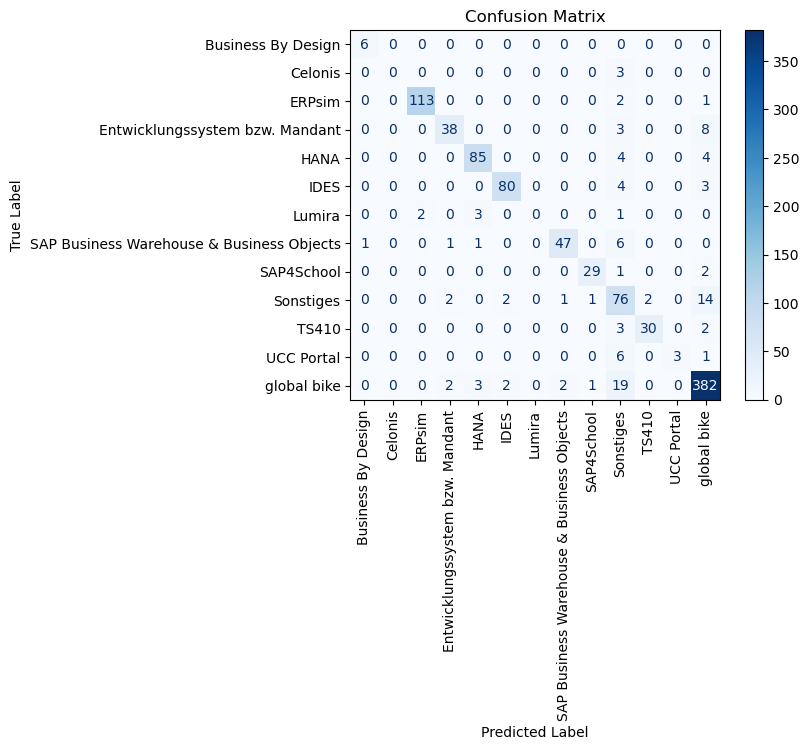

Metrics for SVC
Accuracy: 0.8942115768463074
Precision: 0.9098451388875767
Recall: 0.8942115768463074
F1-Score: 0.8896065395095492
Biggest error betwenen: 3 and 12


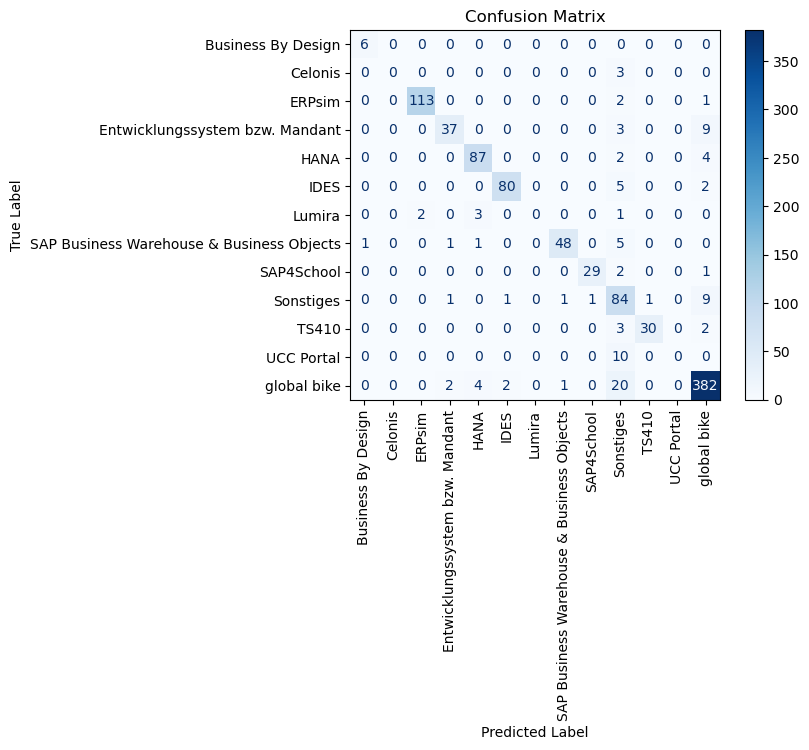

Metrics for MultinomialNB
Accuracy: 0.8792415169660679
Precision: 0.908551361701585
Recall: 0.8792415169660679
F1-Score: 0.8790233677223327
Biggest error betwenen: 3 and 12


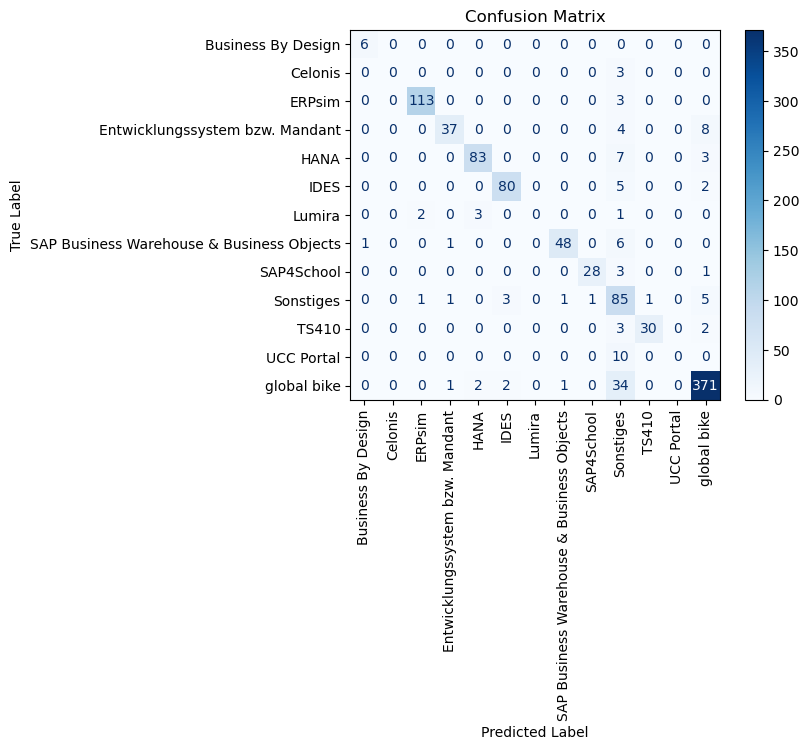

Metrics for LogisticRegression
Accuracy: 0.9031936127744511
Precision: 0.9172340921746066
Recall: 0.9031936127744511
F1-Score: 0.9001396742338239
Biggest error betwenen: 3 and 12


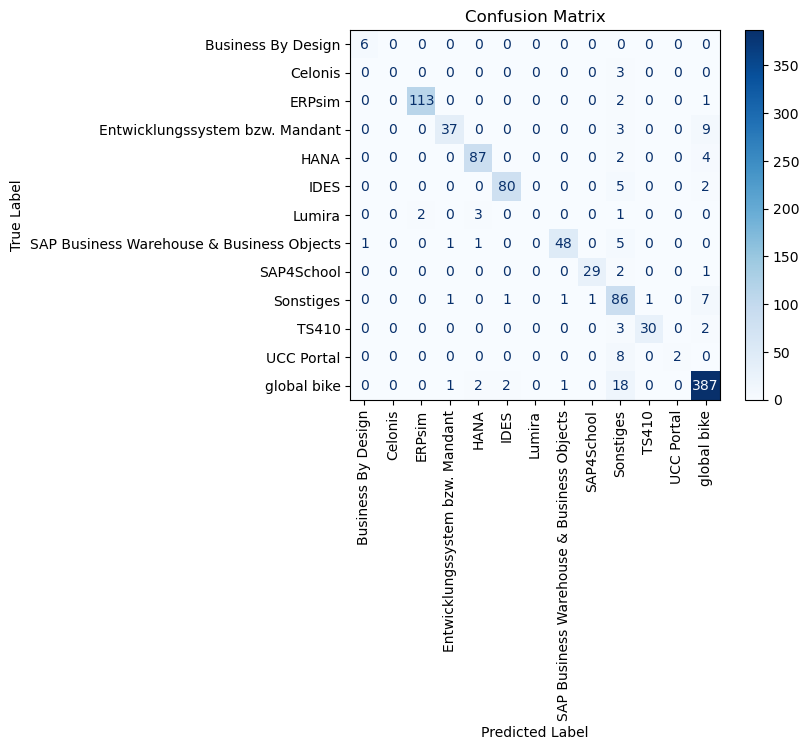

Metrics for KNeighborsClassifier
Accuracy: 0.8832335329341318
Precision: 0.8946930679358764
Recall: 0.8832335329341318
F1-Score: 0.882117894590102
Biggest error betwenen: 9 and 12


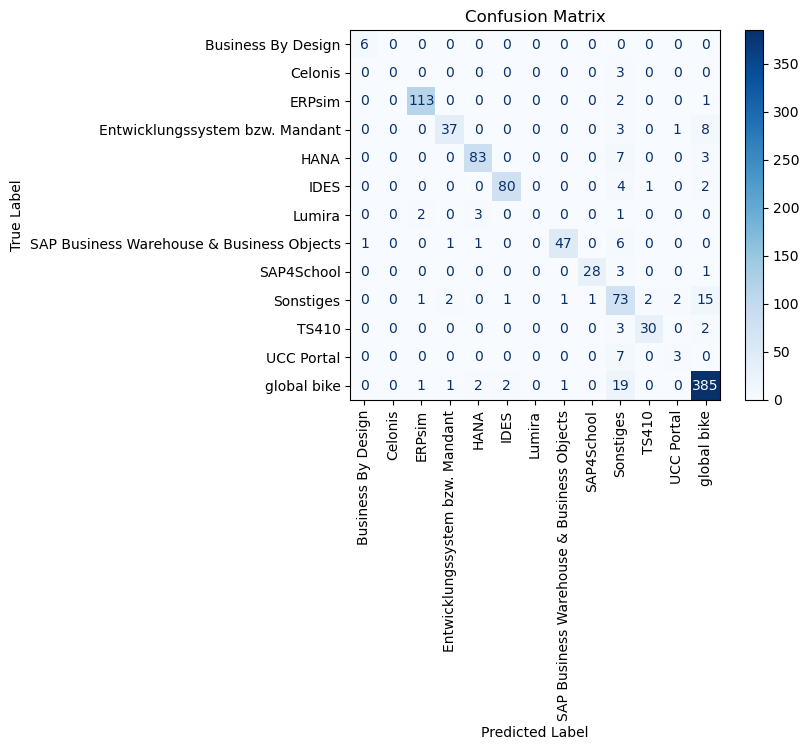

In [61]:
# Default GBI/GBL merged
x_col_keys = ['stemmed_text', 'stemmed_beschreibung'] + categorical_columns
y_col_key = 'Produkt Label (Merged)'

classification_description = 'merged_bike'

x_train, x_test, y_train, y_test = get_single_label_data(tickets, x_col_keys, y_col_key, 0.2)

print('Number training samples:', len(y_train))
print('Number test samples:', len(y_test))

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test, classification_description)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
classify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test, classification_description)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test, classification_description)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test, classification_description)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test, classification_description)

# LSW: I want to see a Perceptron Approach
# sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
# classify_with_metrics(sgd_classifier)

Number training samples: 456
Number test samples: 456
Metrics for RandomForestClassifier
Accuracy: 0.8969298245614035
Precision: 0.9065158037343759
Recall: 0.8969298245614035
F1-Score: 0.896899034595558
Biggest error betwenen: 1 and 12


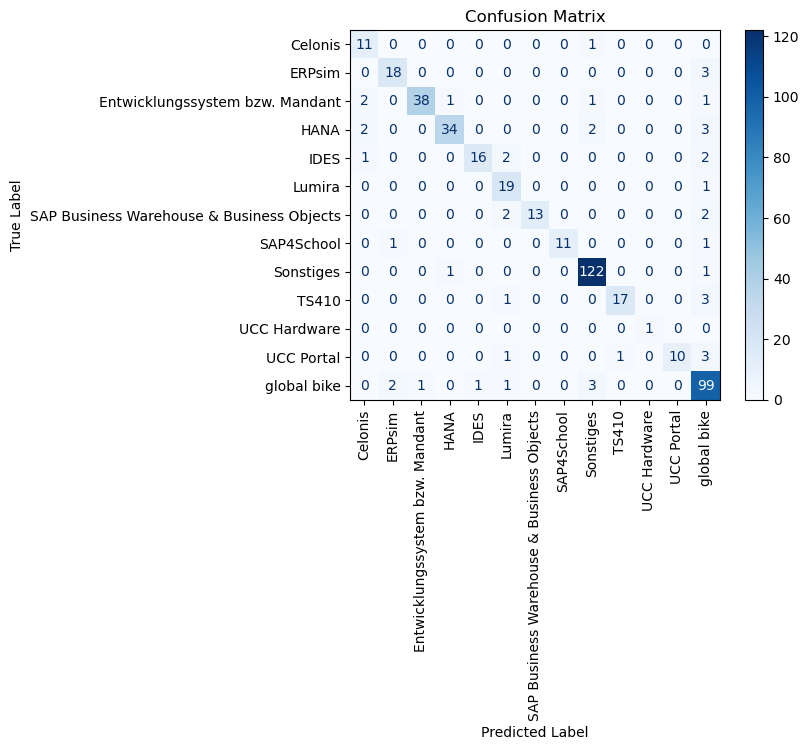

Metrics for SVC
Accuracy: 0.6206140350877193
Precision: 0.6919828531719421
Recall: 0.6206140350877193
F1-Score: 0.5932209290286211
Biggest error betwenen: 1 and 12


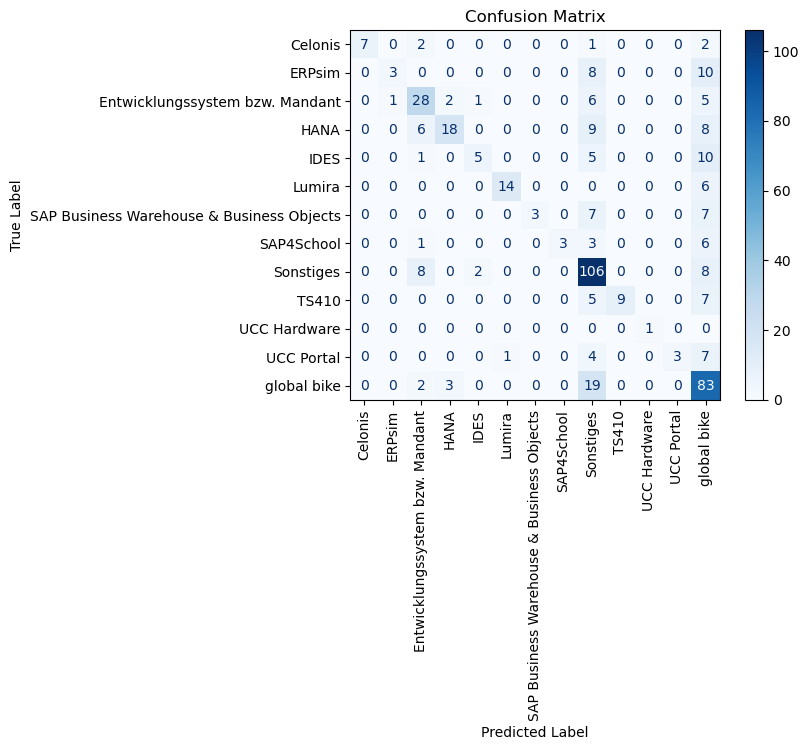

Metrics for MultinomialNB
Accuracy: 0.4868421052631579
Precision: 0.5999941528198439
Recall: 0.4868421052631579
F1-Score: 0.44622763701711066
Biggest error betwenen: 8 and 12


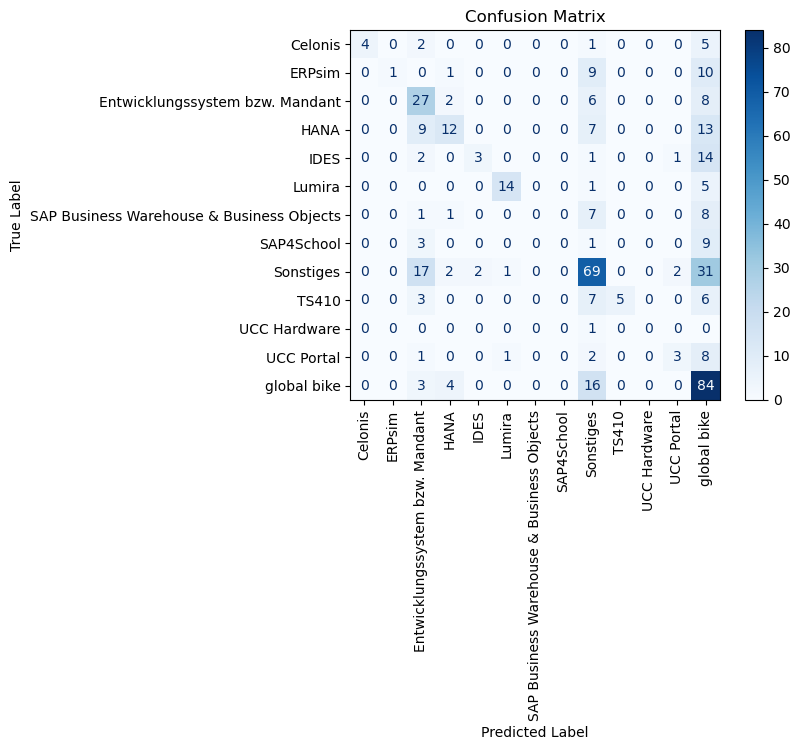

Metrics for LogisticRegression
Accuracy: 0.5767543859649122
Precision: 0.6658345048457003
Recall: 0.5767543859649122
F1-Score: 0.5435081765451953
Biggest error betwenen: 8 and 12


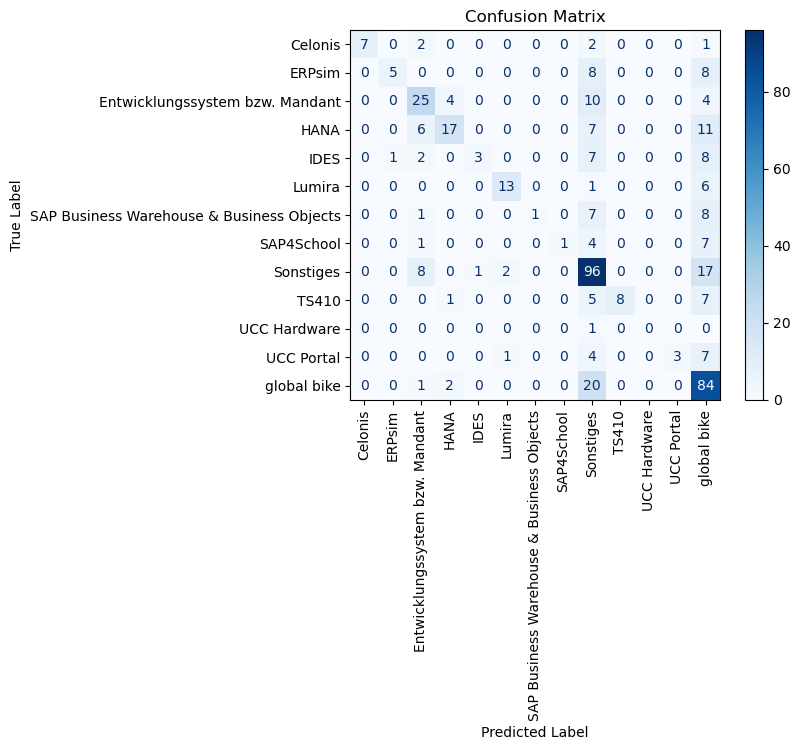

Metrics for KNeighborsClassifier
Accuracy: 0.543859649122807
Precision: 0.5423166772748622
Recall: 0.543859649122807
F1-Score: 0.5247103516553141
Biggest error betwenen: 2 and 8


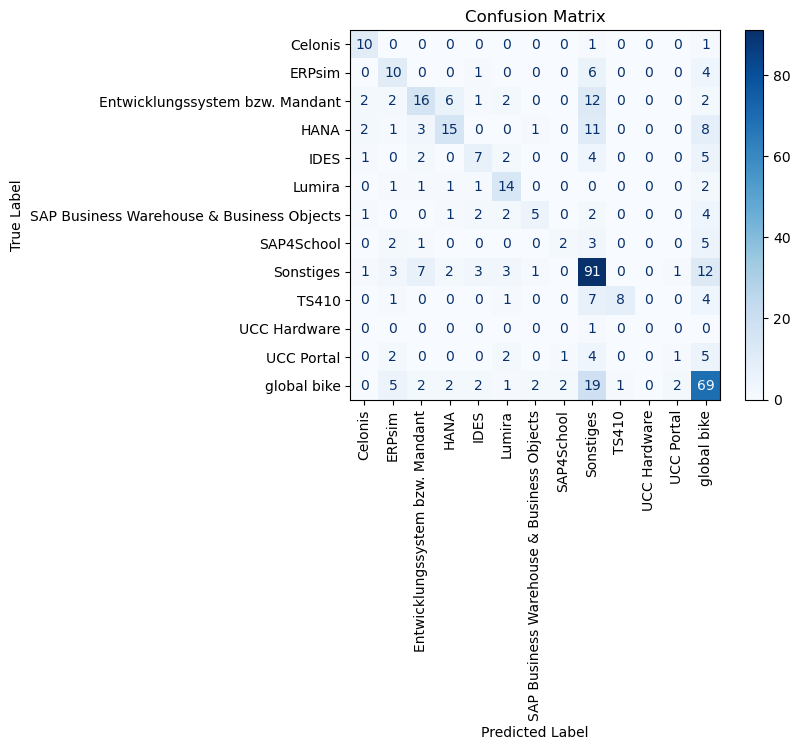

In [62]:
# Incorrectly Labelled Data only# Default GBI/GBL merged
single_incorrect_tickets = tickets[tickets['New Labels'].str.contains(',')]
# single_incorrect_tickets = single_incorrect_tickets[['Text', 'Beschreibung', 'Kategorie ID', 'Unterkategorie ID', 'stemmed_text', 'stemmed_beschreibung', 'Produkt Label (Merged)', 'New Labels']]
# single_incorrect_tickets.head()
# single_incorrect_tickets.to_excel('~/Desktop/error_tickets.xlsx')

x_col_keys = ['stemmed_text', 'stemmed_beschreibung'] + categorical_columns
y_col_key = 'Produkt Label (Merged)'

x_train, x_test, y_train, y_test = get_single_label_data(single_incorrect_tickets, x_col_keys, y_col_key, 0)

classification_description = 'merged_bike_incorrect_labels_only'

print('Number training samples:', len(y_train))
print('Number test samples:', len(y_test))

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test, classification_description)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
classify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test, classification_description)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test, classification_description)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test, classification_description)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test, classification_description)

# LSW: I want to see a Perceptron Approach
# sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
# classify_with_metrics(sgd_classifier)

Number training samples: 1572
Number test samples: 393
Metrics for RandomForestClassifier
Accuracy: 0.7913486005089059
Precision: 0.787032916822816
Recall: 0.7913486005089059
F1-Score: 0.7891006687646483
Biggest error betwenen: 0 and 1


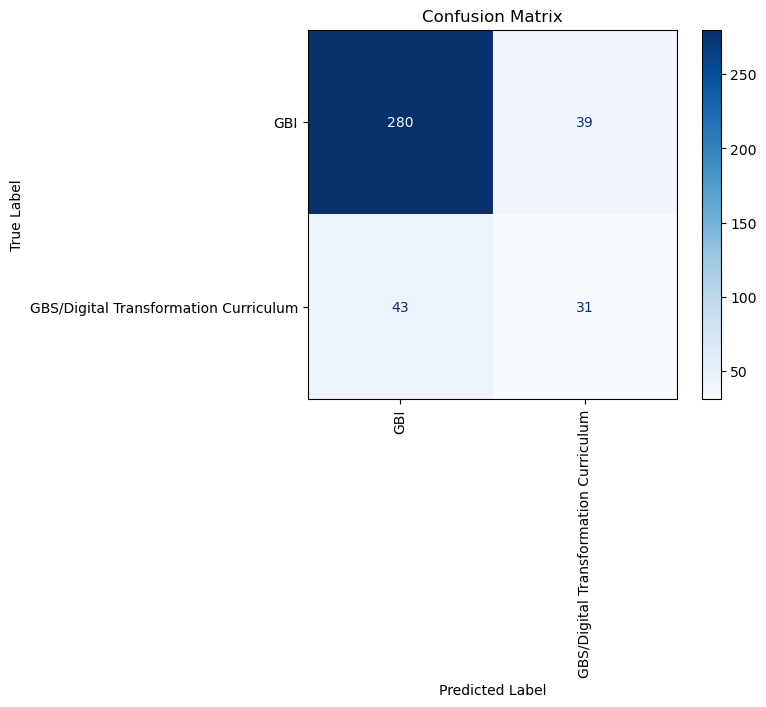

Metrics for SVC
Accuracy: 0.816793893129771
Precision: 0.816793893129771
Recall: 0.816793893129771
F1-Score: 0.816793893129771
Biggest error betwenen: 0 and 1


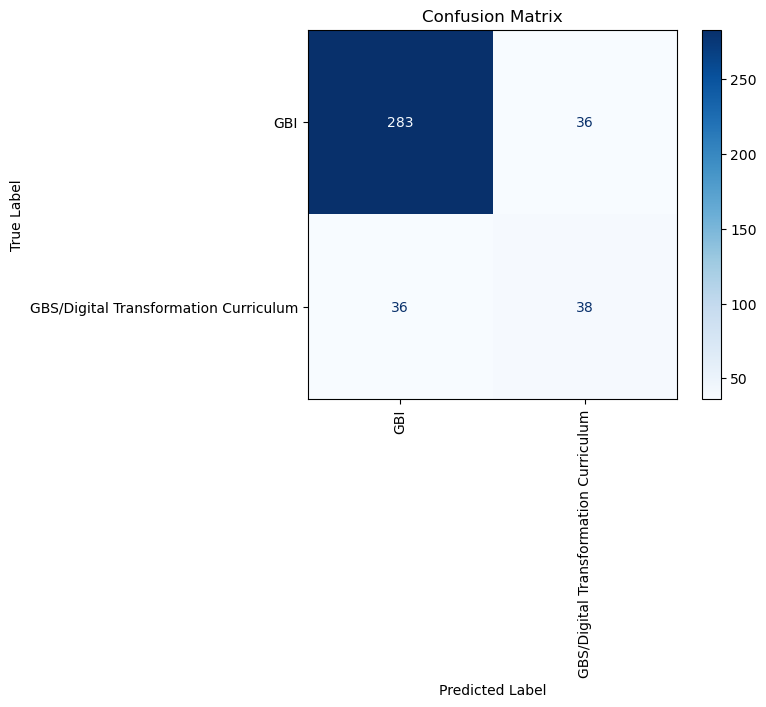

Metrics for MultinomialNB
Accuracy: 0.7430025445292621
Precision: 0.8621144993030345
Recall: 0.7430025445292621
F1-Score: 0.77012860211917
Biggest error betwenen: 0 and 1


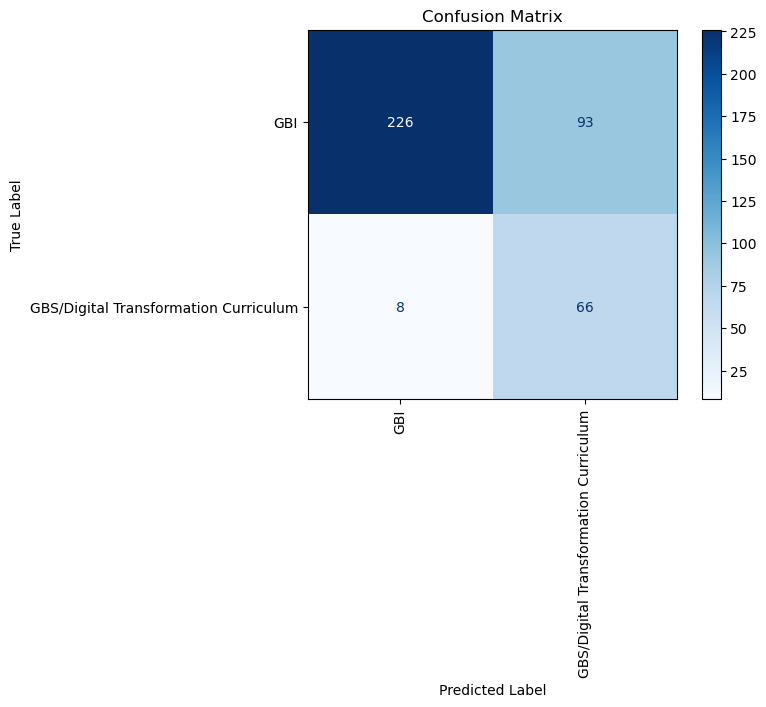

Metrics for LogisticRegression
Accuracy: 0.8396946564885496
Precision: 0.8231648775256597
Recall: 0.8396946564885496
F1-Score: 0.8264258111476835
Biggest error betwenen: 0 and 1


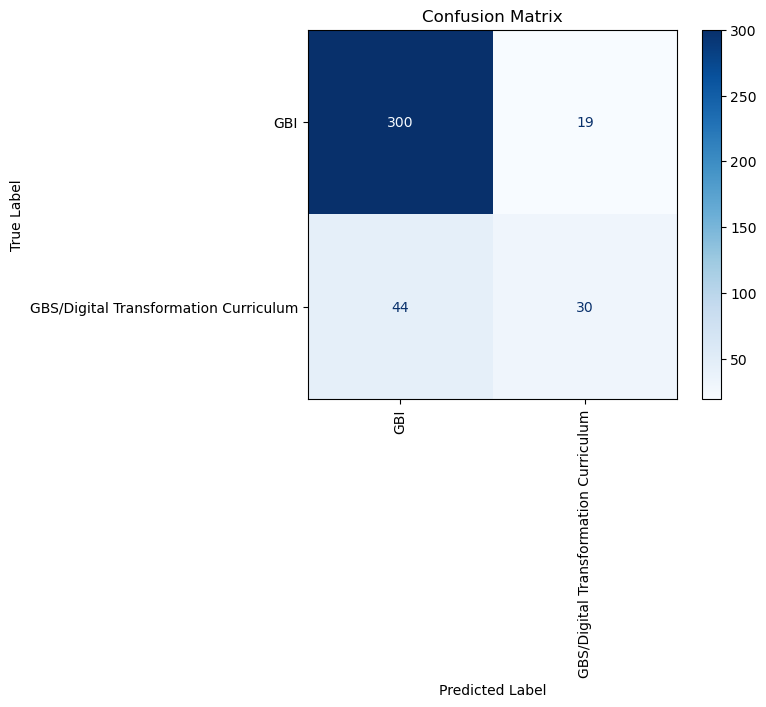

Metrics for KNeighborsClassifier
Accuracy: 0.811704834605598
Precision: 0.8156629912355103
Recall: 0.811704834605598
F1-Score: 0.8135884115132872
Biggest error betwenen: 0 and 1


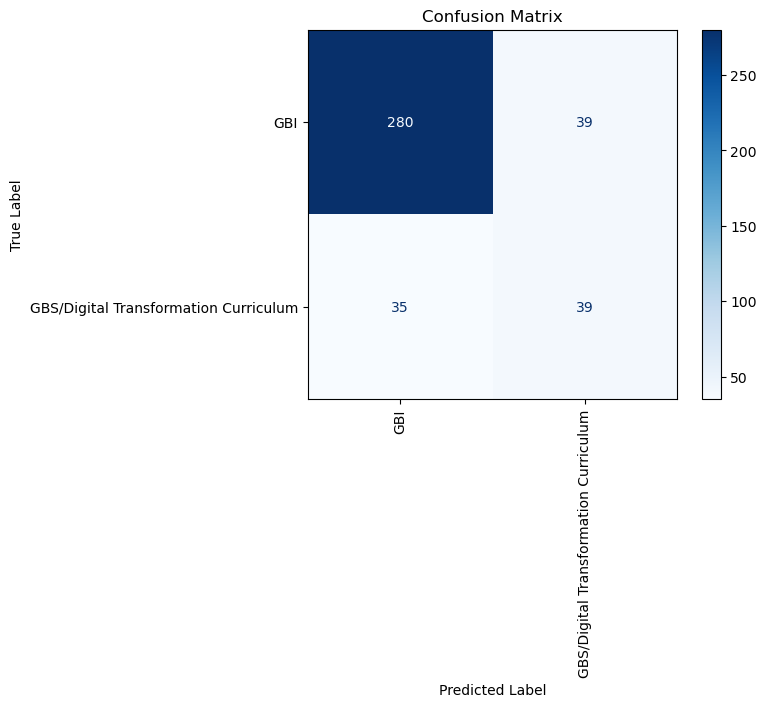

In [63]:
# Bike Internal Classification
bike_tickets = tickets[tickets['Produkt Label (Merged)'] == 'global bike']

x_col_keys = ['stemmed_text', 'stemmed_beschreibung'] + categorical_columns
y_col_key = 'Produkt Label'

x_train, x_test, y_train, y_test = get_single_label_data(bike_tickets, x_col_keys, y_col_key, 0.2)

classification_description = 'bike_internal'

print('Number training samples:', len(y_train))
print('Number test samples:', len(y_test))

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test, classification_description)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
classify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test, classification_description)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test, classification_description)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test, classification_description)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test, classification_description)

# LSW: I want to see a Perceptron Approach
# sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
# classify_with_metrics(sgd_classifier)